<center><h1>INF-552 Lab 0</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. Besides, some topics such as how to make your jupyter notebook be a more efficient developing tools, how to use git and GitHub will also be covered. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

In [1]:
import pandas as pd
import numpy as np

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [7]:
import pandas as pd
pd.read_csv('Salaries.csv', index_col = 'playerID')
#pd.read_csv('Salaries.csv', header = 1)
#pd.read_csv('Salaries.csv', skiprows =[2], header=None)

,0,1,2,3,4
0,yearID,teamID,lgID,playerID,salary
1,1985,ATL,NL,barkele01,870000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [9]:
import pandas as pd
data = pd.read_csv('Salaries.csv', index_col = 'playerID')
greater_than_1_mil = data[((data.teamID =='ATL')|(data.teamID=='HOU')) & (data.salary>= 1000000)]
print('Number of player with ATL ot HOU having salary greater than million:', greater_than_1_mil.shape[0])
print(greater_than_1_mil)

Number of player with ATL ot HOU having salary greater than million: 625
           yearID teamID lgID   salary
playerID                              
hornebo01    1985    ATL   NL  1500000
murphda05    1985    ATL   NL  1625000
suttebr01    1985    ATL   NL  1354167
ryanno01     1985    HOU   NL  1350000
hornebo01    1986    ATL   NL  1800000
...           ...    ...  ...      ...
rasmuco01    2015    HOU   AL  8000000
singljo02    2015    HOU   AL  2000000
sippto01     2015    HOU   AL  2400000
thatcjo01    2015    HOU   AL  1000000
valbulu01    2015    HOU   AL  4200000

[625 rows x 4 columns]


#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [18]:
import pandas as pd
import numpy as np
data = pd.read_csv('Salaries.csv', index_col = 'playerID')
data_ATL = data[(data.teamID == 'ATL')]
data_ATL_std = data_ATL.std(axis=0)
print('standard Deviation of team ATL salary is:', data_ATL_std.salary)
data_ATL_mean = data_ATL.mean(axis=0)
print('Mean of team ATL salary is:', data_ATL_mean.salary)
data_ATL_max = data_ATL.max(axis=0)
print('Max of team ATL salary is:', data_ATL_max.salary)
data_ATL_quartile = data_ATL.quantile([0.25,0.75,0.5])
print('First and Third quartiles, medium of team ATL salary is:', data_ATL_quartile.salary)
data.describe()

standard Deviation of team ATL salary is: 3432672.9832373876
Mean of team ATL salary is: 2206239.316027088
Max of team ATL salary is: 16061802
First and Third quartiles, medium of team ATL salary is: 0.25     300000.0
0.75    2390625.0
0.50     600000.0
Name: salary, dtype: float64


/Users/leo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/Users/leo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,yearID,salary
count,25575.000000,2.557500e+04
mean,2000.374389,2.008563e+06
std,8.610604,3.315706e+06
min,1985.000000,0.000000e+00
25%,1993.000000,2.750000e+05
50%,2000.000000,5.500000e+05
75%,2008.000000,2.250000e+06
max,2015.000000,3.300000e+07


#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [27]:
import pandas as pd
data = pd.read_csv('Salaries.csv')
result = data.to_dict(orient='records')
print(result)

[{'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'playerID': 'barkele01', 'salary': 870000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'playerID': 'bedrost01', 'salary': 550000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'playerID': 'benedbr01', 'salary': 545000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'playerID': 'campri01', 'salary': 633333}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'playerID': 'ceronri01', 'salary': 625000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'playerID': 'chambch01', 'salary': 800000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'playerID': 'dedmoje01', 'salary': 150000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'playerID': 'forstte01', 'salary': 483333}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'playerID': 'garbege01', 'salary': 772000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'playerID': 'harpete01', 'salary': 250000}, {'yearID': 1985, 'teamID': 'ATL', 'lgID': 'NL', 'playerID': 'hornebo01', 'salary

#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [30]:
df=pd.DataFrame(result)
df.columns =['a','b','c','d','e']
df

,a,b,c,d,e
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [34]:
import numpy as np
list=([1,2,3],[4,5,6])
arr = np.array(list)
print(arr)

[[1 2 3]
 [4 5 6]]


#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [52]:
import numpy as np
n_dim = np.ndim(arr)
n_dim
arr.shape
arr.size
arr.dtype
arr.itemsize
arr.data

#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [56]:
import numpy as np
arr.flatten()
np.reshape(arr,(3,2))

array([[1, 2],
       [3, 4],
       [5, 6]])

#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [61]:
import numpy as np
arr = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
arr[0:]
arr[1:, 1:3]

array([[ 6,  7],
       [10, 11]])

#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

In [68]:
array=([[1,2,3],[2,3,4]])
np.square(array)
np.max(array)
np.min(array)
np.argmin(array)
np.argmax(array)

5

#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

In [82]:
import numpy as np
np.eye(4)
np.ones(3)
np.arange(2)
np.zeros(5)
np.linspace(2.0,3.0,num=5)

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

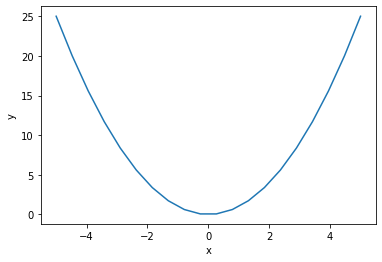

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5, num =20)
y = np.array([j ** 2 for j in x])
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

What happens if the independent variable is not sorted before plotting? Try plotting directly using the following defined array.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
```

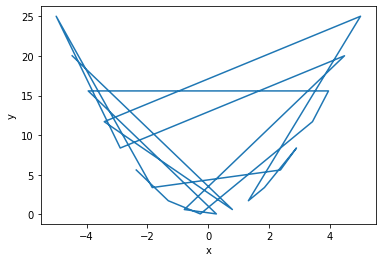

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5, num =20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

(b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

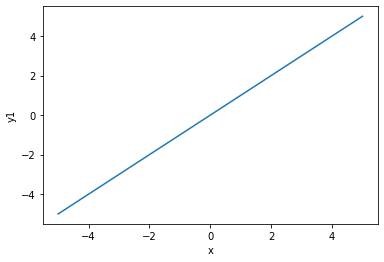

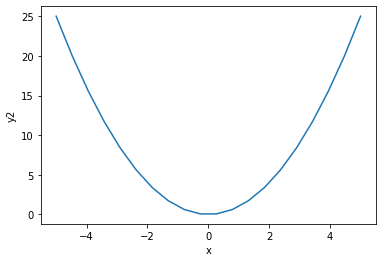

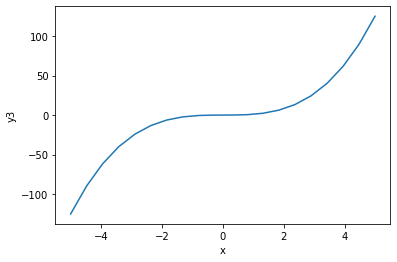

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.plot(x,y1)
plt.xlabel('x')
plt.ylabel('y1')
plt.show()

plt.plot(x,y2)
plt.xlabel('x')
plt.ylabel('y2')
plt.show()

plt.plot(x,y3)
plt.xlabel('x')
plt.ylabel('y3')
plt.show()

(c) Create multiple arrays and plot them into one figure **(No multiple figure and no subplot is allowed in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

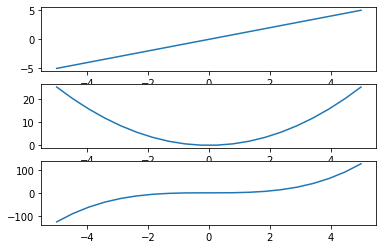

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

fig,(ax1,ax2,ax3) = plt.subplots(3)
ax1.plot(x,y1)
ax2.plot(x,y2)
ax3.plot(x,y3)
plt.show()

(d) Create multiple subplots, play around with the figure size, figure title, and its font style and font size **(One curve is plotted in one subplot in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

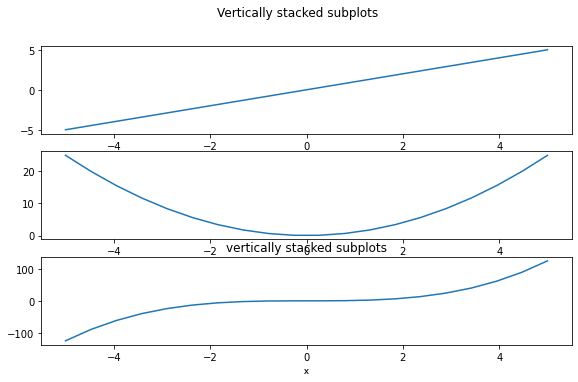

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(9.5,5.5))
fig.suptitle('Vertically stacked subplots')

csfont = {'fontname': 'Comic sams MS'}
hfont = {'fontname': 'Helvetica'}

plt.title('vertically stacked subplots', **csfont)
plt.xlabel('x',**hfont)

ax1.plot(x,y1)
ax2.plot(x,y2)
ax3.plot(x,y3)
plt.show()

(e) Change the limits on x and y axes, **use logarithmic axes to plot**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

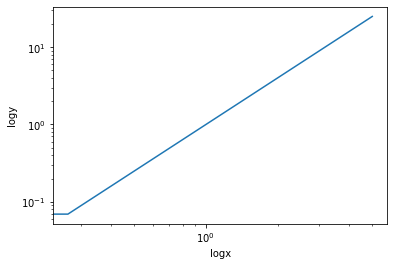

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, num=20)
y = np.array([j **2 for j in x])

fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('logx')
plt.ylabel('logy')

plt.show()

### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

Use the Salaries.csv again (You can use the dataframe object loaded from section 3.1).

(a) For team 'ATL', plot a scatter plot between feature yearID and salary.

<AxesSubplot:title={'center':'Scatterplot between yearID and salary'}, xlabel='salary', ylabel='yearID'>

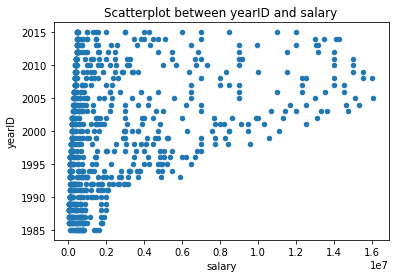

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Salaries.csv', index_col ='playerID')
df = pd.DataFrame(data)
df_copy = df
cols_with_team_ATL=df_copy.loc[df_copy.teamID=='ATL',]
cols_with_team_ATL.plot.scatter(x='salary', y='yearID', title="Scatterplot between yearID and salary")

(b) For year 1985, plot a bar chart to show the average salary for each team.

/Users/leo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:title={'center':'Acerage Salary for each team for the year 1985'}, xlabel='teamID'>

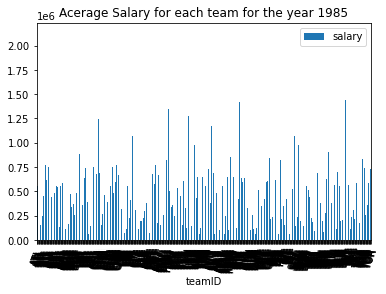

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cols_with_year_1985 = df_copy.loc[df_copy['yearID'] == 1985]
cols_with_year_1985['salary'] = cols_with_year_1985['salary'].astype(int)
cols_with_year_1985.plot.bar(x='teamID', y='salary', rot=70, title='Acerage Salary for each team for the year 1985')

(c) For team 'ATL', plot a line chart to show how the annual average salary change by years.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cols_with_team_ATL['salary'] = cols_with_team_ATL['salary'].astype(int)
cols_with_team_ATL['yearID'] = cols_with_team_ATL['yearID'].astype(int)

cols_with_team_ATL.plot.line(x='yearID', y='salary', title= "Average Salary change by year for the team = ATL")

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

#### Seaborn

(a) Append one more numeric feature to the data frame (can be generated randomly), then for team 'ATL', use the seaborn.pairplot to plot scatter plots among all numeric features in the data frame for team. 

ValueError: cannot set using a list-like indexer with a different length than the value

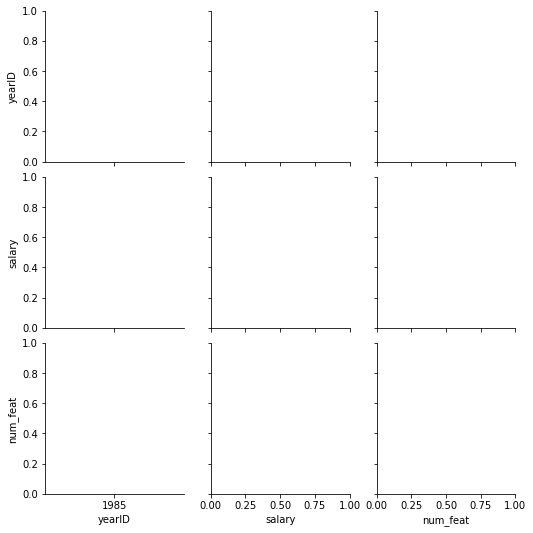

In [48]:
import seaborn as sns
import pandas as pd
var_set = ["yearID", "teamID","lgID", "playerID", "salary"]

head_set =[]
head_set.extend(var_set)
head_set.append('num_feat')

df =pd.read_csv('Salaries.csv', index_col ='playerID', header=None, names = head_set)
df['num_feat']= 100 * np.random.random_sample(df.shape[0])

df_copy = df
cols_with_team_ATL = df_copy.loc[df_copy.teamID =='ATL', ]

pairplot_fig = sns.pairplot(cols_with_team_ATL, vars =['yearID' , 'salary' , 'num_feat'])
plt.subpolts_adjust(top=0.9)
pairplot_fig.fig.suptitle('scatter plots among all numeric features in the data frame for teamID = ATL', fontsize=18,alpha=0.9, weight='bold')
plt.show()



(b) For year 1985 and for each team, plot a boxplot to show how the salary distribute within a team.

/Users/leo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.1, 'Boxplot of salary distribution for the year 1985 for each team')

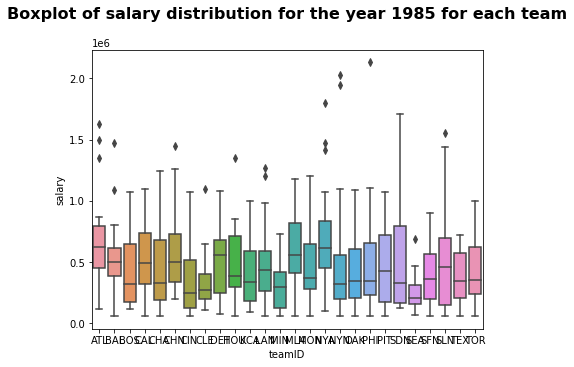

In [51]:
cols_with_year_1985 = df_copy.loc[df_copy.yearID=='1985',]
cols_with_year_1985['salary'] = cols_with_year_1985['salary'].astype(int)

fig, ax=plt.subplots(figsize=(7,5))
sns.boxplot(x='teamID',y='salary', data = cols_with_year_1985, orient='v')
fig.subplots_adjust(top=0.9)
ax.text(x=0.5,y=1.1,s='Boxplot of salary distribution for the year 1985 for each team', fontsize =16, weight ='bold', ha='center', va='bottom', transform = ax.transAxes)

(c) Read the offical documentation (https://seaborn.pydata.org/) to understand how lmplot, catplot, relplot, and jointplot works.

### Jupyter Notebook

#### Jupyter Notebook Extensions

Extensions such as the code formatter, table of content is to make your development more efficient. To explore it, please refer to https://github.com/ipython-contrib/jupyter_contrib_nbextensions.

#### Jupyter Visual Debugger

The Pixie Debugger is a visual debugger for debugging on Jupyter Notebook. To explore it, please refer to https://medium.com/codait/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62.

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.